In [1]:
import plotly 
plotly.tools.set_credentials_file(username='dantzelevitch', api_key='PJgrq35QH890fKSDKw0A')
import plotly.plotly as py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy

In [2]:
statename_to_abbr = {
    # Other
    'District of Columbia': 'DC',
    
    # States
    'Alabama': 'AL',
    'Montana': 'MT',
    'Alaska': 'AK',
    'Nebraska': 'NE',
    'Arizona': 'AZ',
    'Nevada': 'NV',
    'Arkansas': 'AR',
    'New Hampshire': 'NH',
    'California': 'CA',
    'New Jersey': 'NJ',
    'Colorado': 'CO',
    'New Mexico': 'NM',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Delaware': 'DE',
    'North Carolina': 'NC',
    'Florida': 'FL',
    'North Dakota': 'ND',
    'Georgia': 'GA',
    'Ohio': 'OH',
    'Hawaii': 'HI',
    'Oklahoma': 'OK',
    'Idaho': 'ID',
    'Oregon': 'OR',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Indiana': 'IN',
    'Rhode Island': 'RI',
    'Iowa': 'IA',
    'South Carolina': 'SC',
    'Kansas': 'KS',
    'South Dakota': 'SD',
    'Kentucky': 'KY',
    'Tennessee': 'TN',
    'Louisiana': 'LA',
    'Texas': 'TX',
    'Maine': 'ME',
    'Utah': 'UT',
    'Maryland': 'MD',
    'Vermont': 'VT',
    'Massachusetts': 'MA',
    'Virginia': 'VA',
    'Michigan': 'MI',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Wisconsin': 'WI',
    'Missouri': 'MO',
    'Wyoming': 'WY',
}

stateXX = pd.DataFrame.from_dict(statename_to_abbr, orient='index', columns=['XX'])
stateXX['State'] = stateXX.index
stateXX.head()

,XX,State
District of Columbia,DC,District of Columbia
Alabama,AL,Alabama
Montana,MT,Montana
Alaska,AK,Alaska
Nebraska,NE,Nebraska


In [3]:
party = pd.read_table('PartybyState.csv', delimiter=',')
party.head()

,State,Party
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Republican
3,Arkansas,Republican
4,California,Democrat


In [4]:
fedmw = pd.read_table('FEDMINNFRWG.csv', delimiter = ',')
fedmw['DATE'] = fedmw['DATE'].str[:4]
fedmw['Year'] = [int(row) for row in fedmw['DATE']]
fedmw.drop_duplicates(subset='Year', inplace=True)
fedmw.head()

,DATE,FEDMINNFRWG,Year
0,1938,0.25,1938
3,1939,0.25,1939
15,1940,0.30,1940
27,1941,0.30,1941
39,1942,0.30,1942


In [5]:
mw = pd.read_table('Minimum Wage Data.csv', delimiter=',')
mw = pd.merge(mw,fedmw, how='left', on='Year' )
mw['fed.2018'] = mw['FEDMINNFRWG'] / (mw['CPI.Average'] / 250.5)
mw['true.2018'] = mw[['fed.2018','High.2018']].max(axis=1) 
mw = pd.merge(mw,stateXX, how='left', on='State' )
mw = pd.merge(mw,party, how='left', on='State')
mw = mw.drop(columns=['Low.Value','Low.2018','DATE'], axis=1)
mw.head()

,Year,State,Table_Data,Footnote,High.Value,CPI.Average,High.2018,FEDMINNFRWG,fed.2018,true.2018,XX,Party
0,1968,Alabama,...,NaN,0.00000,34.783333,0.00,1.4,10.082415,10.082415,AL,Republican
1,1968,Alaska,2.10,NaN,2.10000,34.783333,15.12,1.4,10.082415,15.120000,AK,Republican
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,34.783333,4.75,1.4,10.082415,10.082415,AZ,Republican
3,1968,Arkansas,1.25/day(b),(b),0.15625,34.783333,1.12,1.4,10.082415,10.082415,AR,Republican
4,1968,California,1.65(b),(b),1.65000,34.783333,11.88,1.4,10.082415,11.880000,CA,Democrat


In [6]:
#Create 3 continuous data sets,  1997, 2007, 2017
data2017 = mw.loc[(mw['Year'] == 2017)]
data2007 = mw.loc[(mw['Year'] == 2007)]
data1997 = mw.loc[(mw['Year'] == 1997) ]
datalast20 = mw.loc[mw['Year'].isin(['1997','2007','2017'])]

mw2017 = data2017['true.2018']
mw2007 = data2007['true.2018']
mw1997 = data1997['true.2018']

Text(0.5,0,'Min Wage')

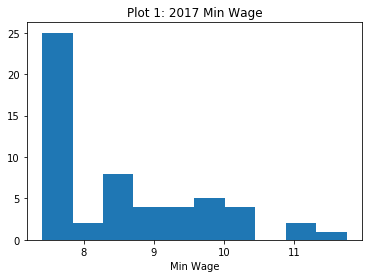

In [7]:
plt.hist(mw2017)
plt.title('Plot 1: 2017 Min Wage')
plt.xlabel('Min Wage')

Text(0.5,0,'2017')

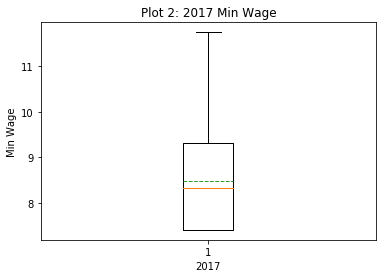

In [8]:
plt.boxplot(mw2017, meanline='True', showmeans='True' )
plt.title('Plot 2: 2017 Min Wage')
plt.ylabel('Min Wage')
plt.xlabel('2017')

Text(0.5,1,'Plot 3: 2017 Min Wage (Federal vs State)')

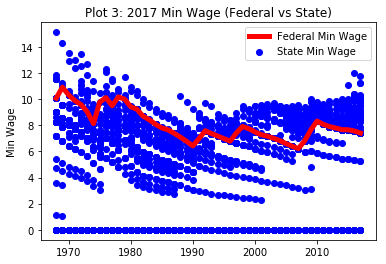

In [9]:
plt.scatter(mw['Year'], mw['High.2018'], color='blue', label='State Min Wage')
plt.plot(mw['Year'], mw['fed.2018'], color='red', label='Federal Min Wage', linewidth=5)
plt.xlabel('')
plt.ylabel('Min Wage')
plt.legend(loc='upper right')
plt.title('Plot 3: 2017 Min Wage (Federal vs State)')

In [10]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data2017['XX'],
        z = data2017['true.2018'].astype(float),
        locationmode = 'USA-states',
        text = data2017['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Min Wage by State")
        ) ]

layout = dict(
        title = 'Plot 4: Min Wage by State <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dantzelevitch/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


<function matplotlib.pyplot.show(*args, **kw)>

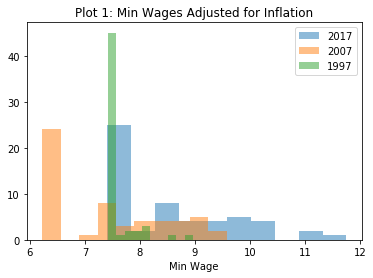

In [11]:
plt.hist(mw2017, alpha=.5, label='2017')
plt.hist(mw2007, alpha=.5, label='2007')
plt.hist(mw1997, alpha=.5, label='1997')
plt.xlabel('Min Wage')
plt.title('Plot 1: Min Wages Adjusted for Inflation')
plt.legend(loc='upper right')
plt.show

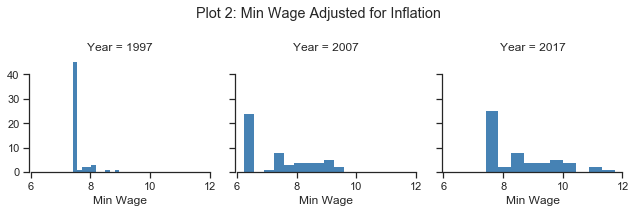

In [12]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic
# Tell seaborn about the structure of our data.
g = sns.FacetGrid(datalast20, col="Year")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "true.2018", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.75)
# Making a more informative axis name.
g.set_axis_labels('Min Wage')
plt.suptitle('Plot 2: Min Wage Adjusted for Inflation')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

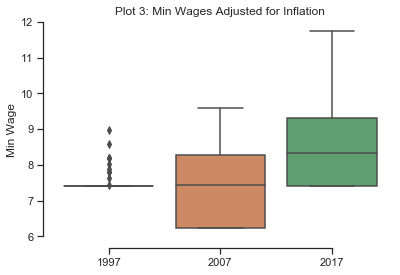

In [13]:
box = sns.boxplot(y='true.2018', x='Year', data=datalast20 )
plt.title('Plot 3: Min Wages Adjusted for Inflation')
sns.despine(offset=10, trim=True)
box.set(xlabel='',ylabel='Min Wage')
plt.show

Text(0.5,1,'Plot 4: Min Wage By Year Adjusted for Inflation')

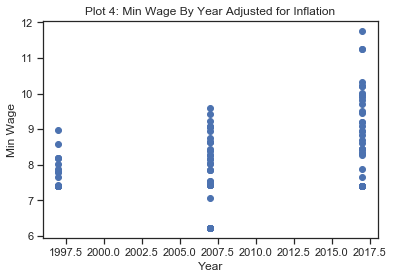

In [14]:
plt.scatter(datalast20['Year'],datalast20['true.2018'])
plt.xlabel('Year')
plt.ylabel('Min Wage')
plt.title('Plot 4: Min Wage By Year Adjusted for Inflation')

[Text(0,0.5,'Min Wage'), Text(0.5,0,'Political Party')]

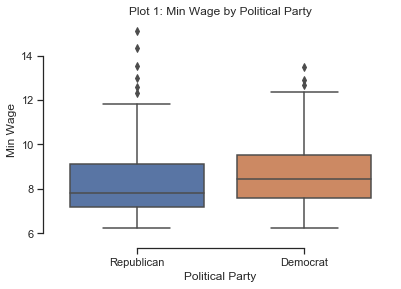

In [15]:
b = sns.boxplot(y='true.2018', x='Party', data=mw )
plt.title('Plot 1: Min Wage by Political Party')
sns.despine(offset=10, trim=True)
b.set(xlabel='Political Party',ylabel='Min Wage')



<function matplotlib.pyplot.show(*args, **kw)>

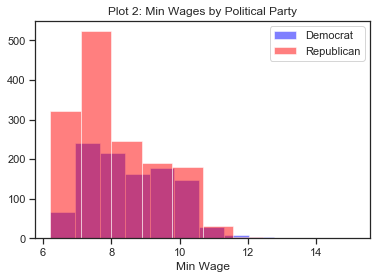

In [16]:
mwDemocrat = mw.loc[mw['Party'] == 'Democrat']
mwRepublican = mw.loc[mw['Party'] == 'Republican']


plt.hist(mwDemocrat['true.2018'], alpha=.5, label='Democrat', color='blue')
plt.hist(mwRepublican['true.2018'], alpha=.5, label='Republican', color='red')


plt.xlabel('Min Wage')
plt.title('Plot 2: Min Wages by Political Party')
plt.legend(loc='upper right')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

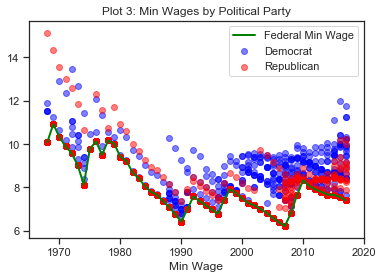

In [17]:
plt.scatter(mwDemocrat['Year'],mwDemocrat['true.2018'], alpha=.5, label='Democrat', color='blue')
plt.scatter(mwRepublican['Year'],mwRepublican['true.2018'], alpha=.5, label='Republican', color='red')
plt.plot(mw['Year'], mw['fed.2018'], color='green', label='Federal Min Wage', linewidth=2)

plt.xlabel('Min Wage')
plt.title('Plot 3: Min Wages by Political Party')
plt.legend(loc='upper right')
plt.show

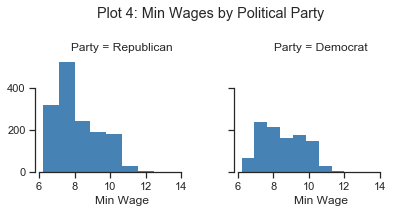

In [18]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic
# Tell seaborn about the structure of our data.
g = sns.FacetGrid(mw, col="Party")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "true.2018", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.75)
# Making a more informative axis name.
g.set_axis_labels('Min Wage')
plt.suptitle('Plot 4: Min Wages by Political Party')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

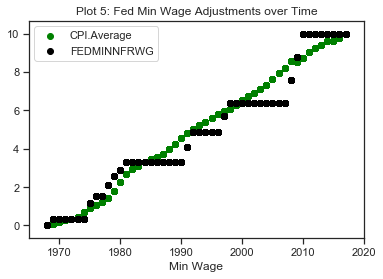

In [19]:
def normalize(series, upper):
    dataNorm=((series-series.min())/(series.max()-series.min()))*upper
    return dataNorm


plt.scatter(mw['Year'], normalize(mw['CPI.Average'],10), color='green', )
plt.scatter(mw['Year'], normalize(mw['FEDMINNFRWG'],10), color='black')
plt.xlabel('Min Wage')
plt.title('Plot 5: Fed Min Wage Adjustments over Time')
plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

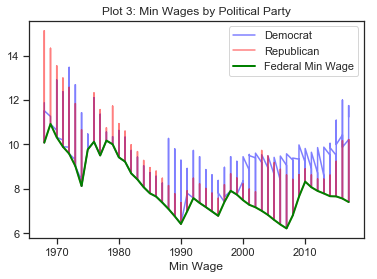

In [20]:
plt.plot(mwDemocrat['Year'],mwDemocrat['true.2018'], alpha=.5, label='Democrat', color='blue')
plt.plot(mwRepublican['Year'],mwRepublican['true.2018'], alpha=.5, label='Republican', color='red')
plt.plot(mw['Year'], mw['fed.2018'], color='green', label='Federal Min Wage', linewidth=2)

plt.xlabel('Min Wage')
plt.title('Plot 3: Min Wages by Political Party')
plt.legend(loc='upper right')
plt.show